# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1


## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | valence
Processing Record 3 of Set 1 | ilulissat
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1 | cockburn harbour
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | egvekinot
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cape town
City not found. Skipping...
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | soyo
Processing Record 12 of Set 1 | sao pedro
Processing Record 13 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | hambantota
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | souillac
City not found. Skipp

Processing Record 41 of Set 4 | tres picos
Processing Record 42 of Set 4 | cairns
Processing Record 43 of Set 4 | nikolaevo
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | beyneu
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | acari
Processing Record 49 of Set 4 | iacobeni
Processing Record 1 of Set 5 | ayotzintepec
Processing Record 2 of Set 5 | impfondo
Processing Record 3 of Set 5 | fairhope
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | dobele
Processing Record 8 of Set 5 | tiarei
Processing Record 9 of Set 5 | gornopravdinsk
Processing Record 10 of Set 5 | badnawar
Processing Record 11 of Set 5 | banda aceh
Processing Record 12 of Set 5 | labuhan
Processing Record 13 of Set 5 | spornoye
Processing Record 14 of Set 5 | dzhebariki-khaya
City not found. Skipping...
Processing Record 15 o

Processing Record 29 of Set 8 | tasiilaq
City not found. Skipping...
Processing Record 30 of Set 8 | sobolevo
Processing Record 31 of Set 8 | muros
Processing Record 32 of Set 8 | ust-nera
Processing Record 33 of Set 8 | burgersdorp
Processing Record 34 of Set 8 | portage
Processing Record 35 of Set 8 | muskogee
Processing Record 36 of Set 8 | jacareacanga
Processing Record 37 of Set 8 | carlagan
Processing Record 38 of Set 8 | saskylakh
Processing Record 39 of Set 8 | poso
Processing Record 40 of Set 8 | voh
Processing Record 41 of Set 8 | gigmoto
Processing Record 42 of Set 8 | kysyl-syr
Processing Record 43 of Set 8 | north bend
Processing Record 44 of Set 8 | bull savanna
Processing Record 45 of Set 8 | tazovskiy
City not found. Skipping...
Processing Record 46 of Set 8 | orange
Processing Record 47 of Set 8 | kargopol
Processing Record 48 of Set 8 | inongo
Processing Record 49 of Set 8 | black river
Processing Record 1 of Set 9 | benalla
Processing Record 2 of Set 9 | banepa
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
#dictionary for establishing df
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [55]:
#establish df
weather_df = pd.DataFrame(weather_dict)

In [56]:
#show df headers
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,clyde river,1,US,1579639122,63,41.30,-82.98,30.99,8.05
1,valence,20,ES,1579639265,87,39.47,-0.38,54.00,5.82
2,ilulissat,100,GL,1579639303,74,69.22,-51.10,8.69,7.99
3,cockburn harbour,5,AU,1579639083,28,-32.08,141.00,73.40,8.05
4,faanui,19,PF,1579639304,79,-16.48,-151.75,81.55,12.50


In [57]:
#output to csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

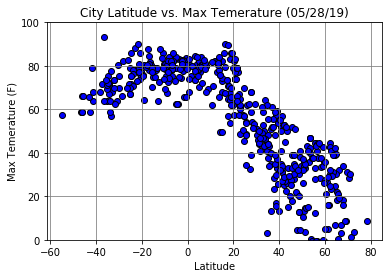

In [58]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temerature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.ylim(0,100)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gray")
plt.savefig("Figures/fig1.png")
plt.show()


#### Latitude vs. Humidity Plot

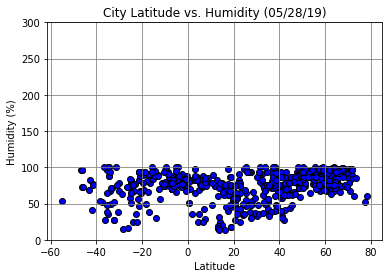

In [59]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gray")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

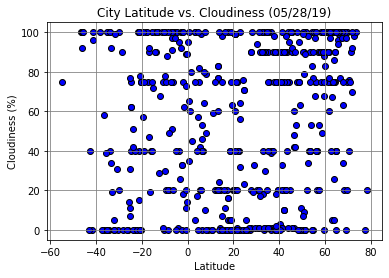

In [60]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gray")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

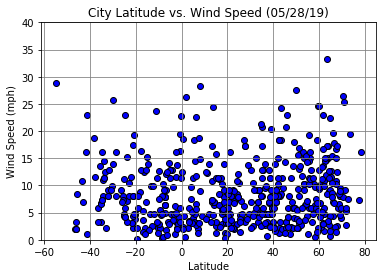

In [65]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="gray")
plt.savefig("Figures/fig4.png")
plt.show()
          

## Linear Regression

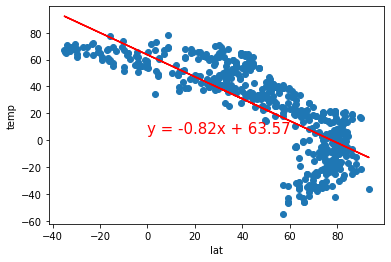

In [175]:
# OPTIONAL: Create a function to create Linear Regression plots

import scipy.stats as st
x_values = weather_df['Max Temp']
y_values = weather_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 5),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('temp')
plt.show()

In [97]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[(weather_df["Lat"]>=0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

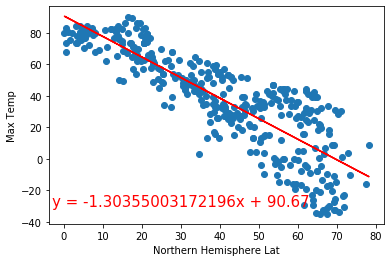

In [186]:

# OPTIONAL: Create a function to create Linear Regression plots

import scipy.stats as st
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,15)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-3, -30),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lat')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [101]:
southern_df = weather_df[(weather_df["Lat"]<0)]

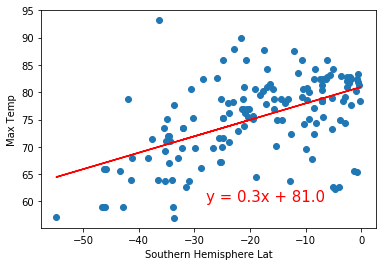

In [191]:
import scipy.stats as st
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-28, 60),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lat')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

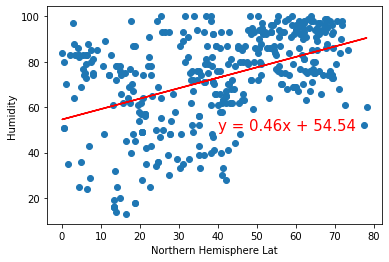

In [194]:
import scipy.stats as st
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lat')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

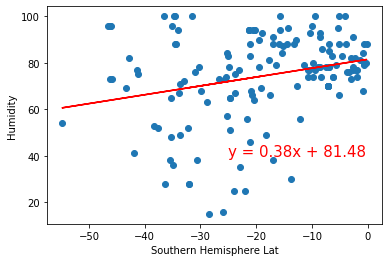

In [163]:
import scipy.stats as st
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 40),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lat')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

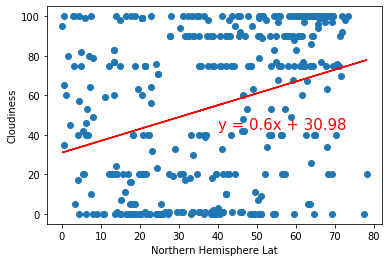

In [204]:
import scipy.stats as st
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 43),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lat')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

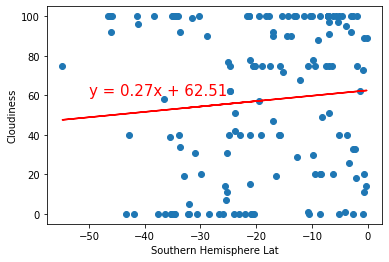

In [195]:
import scipy.stats as st
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lat')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

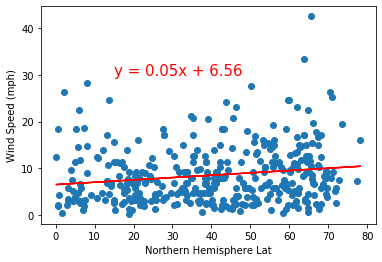

In [151]:
import scipy.stats as st
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 30),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lat')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

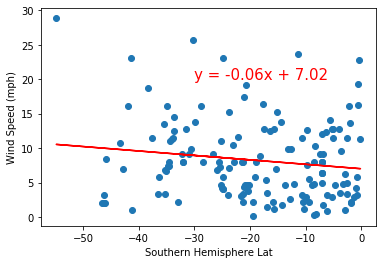

In [156]:
import scipy.stats as st
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 20),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lat')
plt.ylabel('Wind Speed (mph)')
plt.show()